Vedant Agnihotri

Customer Segmentation Using K-Means </br> 
Dataset is from Kaggle </br> 
Link- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [52]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


IsNull Values?

In [53]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dropping ID column

In [54]:
df = df.drop('CustomerID', axis=1)
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


Exploring the Data

C:\Users\vedan\AppData\Local\Temp\ipykernel_25624\1154144886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
C:\Users\vedan\AppData\Local\Temp\ipykernel_25624\1154144886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
C:\Users\vedan\AppData\Local\Tem

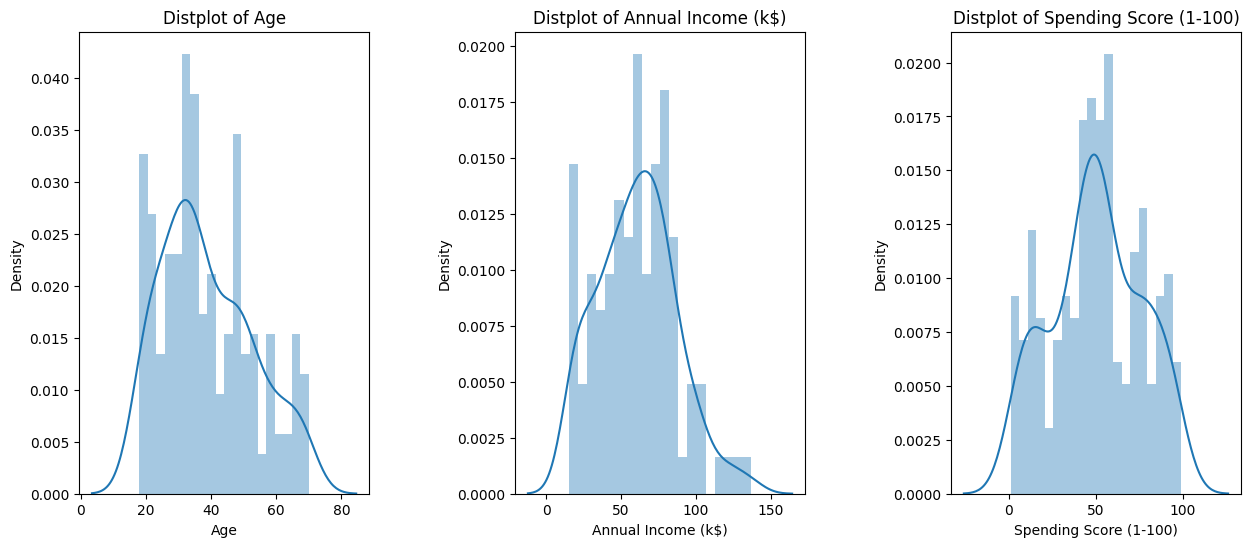

In [55]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

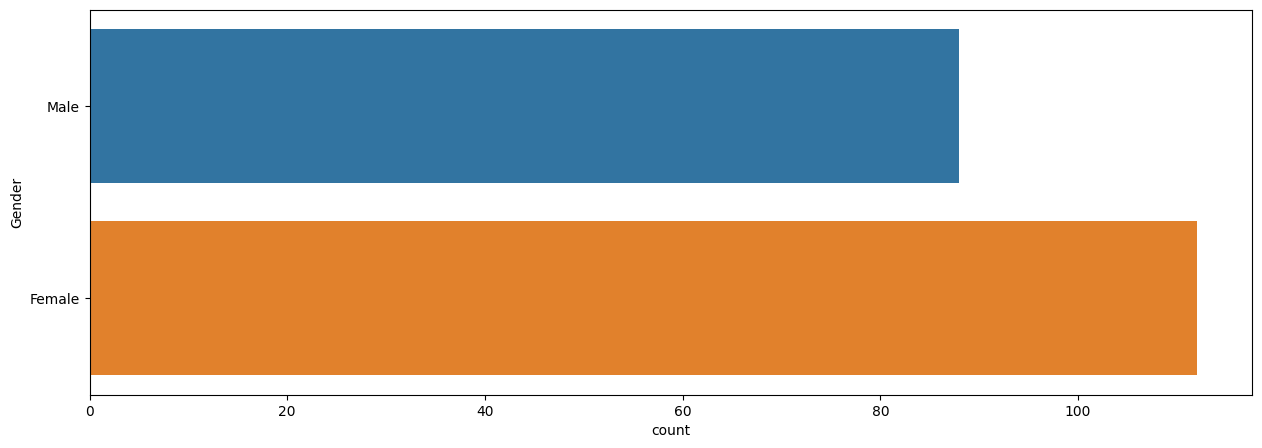

In [56]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()


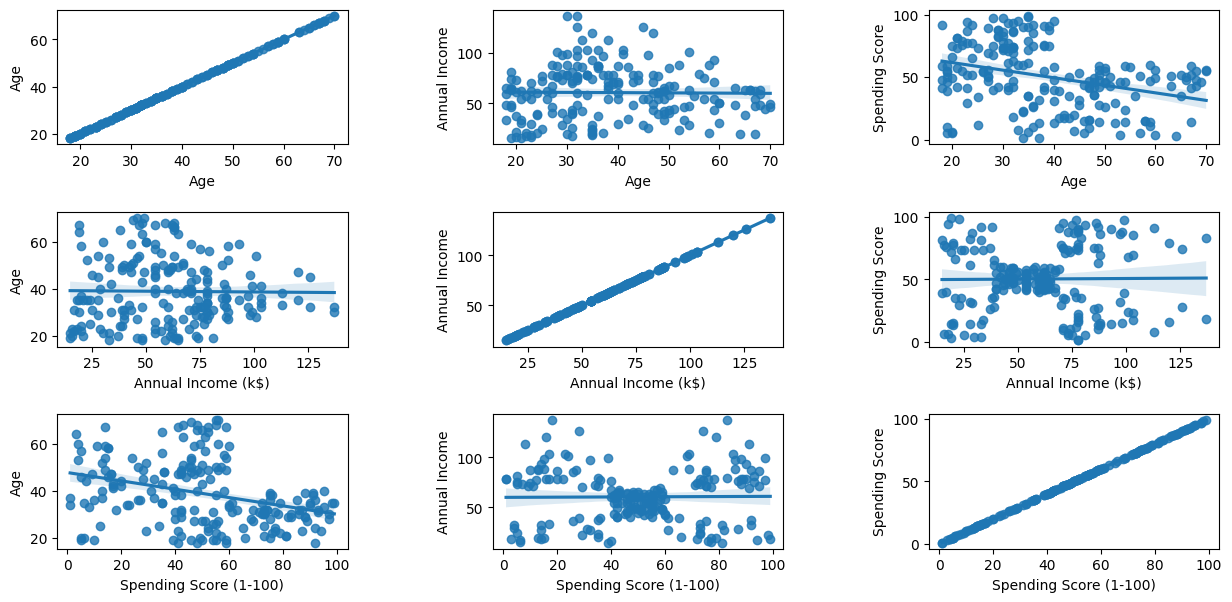

In [57]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data_df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Splitting into Train Test set 

In [58]:
train_X, test_X = train_test_split(df, test_size=0.2, random_state=42)

# print(len(train_X), "train +", len(test_X), "test")
df1 = train_X.copy()

Preparing Data

Male and Female as 0 and 1

In [59]:
le = LabelEncoder()
le.fit(df1.Gender)
df1.loc[:,'Gender'] = le.transform(df1.Gender)
df1.head(3)

C:\Users\vedan\AppData\Local\Temp\ipykernel_25624\3955399483.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df1.loc[:,'Gender'] = le.transform(df1.Gender)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,0,49,54,42
197,1,32,126,74
38,0,36,37,26


In [60]:
# Create scaler: scaler
scaler = StandardScaler()
scaler.fit(df1)
# transform
data_scaled = scaler.transform(df1)
data_scaled[0]

array([-0.87077078,  0.73027906, -0.24190423, -0.37113766])

Principle Component Analysis

In [61]:
pca = PCA()

# fit PCA
pca.fit(data_scaled)
# PCA features
features = range(pca.n_components_)
# PCA transformed data
data_pca = pca.transform(data_scaled)
pca.explained_variance_ratio_

array([0.33107688, 0.26720006, 0.22991261, 0.17181045])

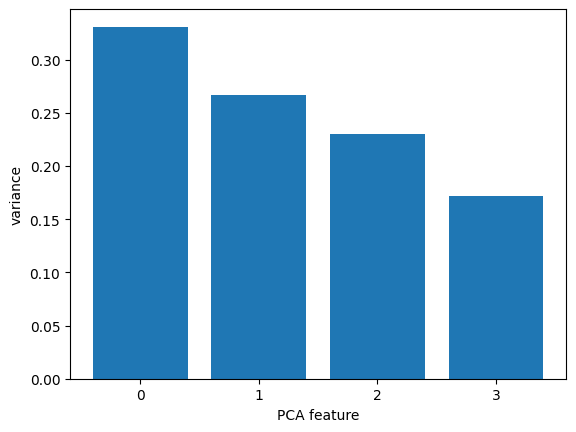

In [62]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

(160, 2)


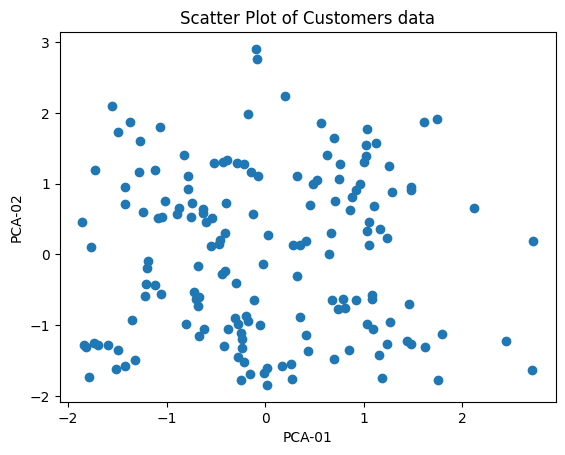

In [63]:
# Principal component analysis (PCA) and singular value decomposition (SVD) 
# PCA and SVD are closely related approaches and can be both applied to decompose any rectangular matrices.
pca2 = PCA(n_components=2, svd_solver='full')
# fit PCA
pca2.fit(data_scaled)

# PCA transformed data
data_pca2 = pca2.transform(data_scaled)
print(data_pca2.shape)

xs = data_pca2[:,0]
ys = data_pca2[:,1]
plt.scatter(ys, xs)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

Using Elbow Method to Find K-Means Cluster Needed 

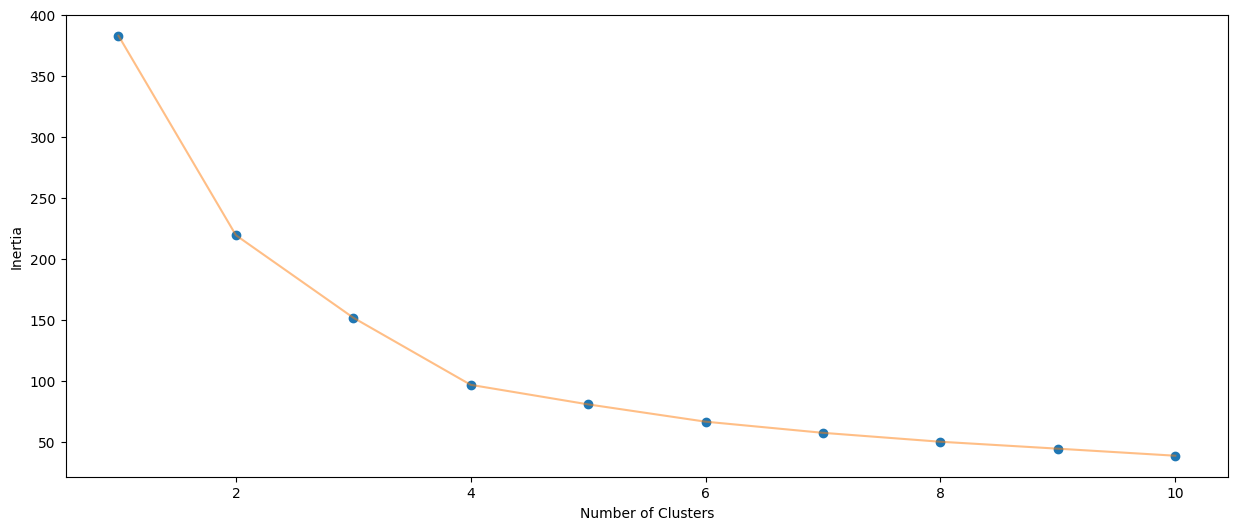

In [64]:
X = data_pca2
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++',random_state= 42 ) )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)  

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

K-Means Clustering with 5 clusters

In [65]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Pipelining

In [66]:
# Build pipeline
pipeline = make_pipeline(scaler, pca2, kmeans)
# fit the model to the scaled dataset
model_fit = pipeline.fit(df1)
model_fit

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2, svd_solver='full')),
                ('kmeans', KMeans(n_clusters=5, random_state=0))])

In [67]:
# return a label for each data point based on their cluster
labels = model_fit.predict(df1)
train_X['Clusters'] = labels

# Number of data points for each feature in each cluster
train_X.groupby('Clusters').count()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,,
0,43,43,43,43
1,24,24,24,24
2,37,37,37,37
3,38,38,38,38
4,18,18,18,18


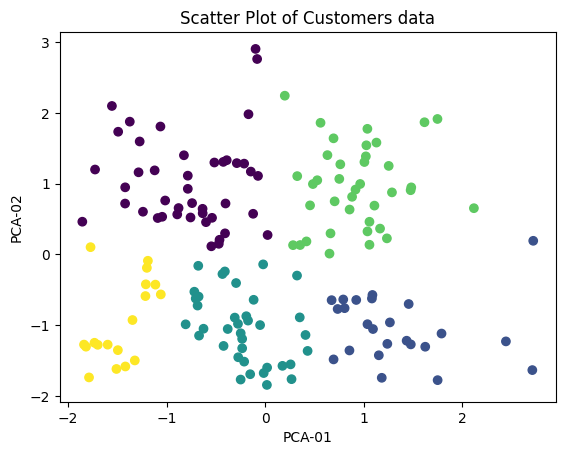

In [68]:
# Scatter plot visuals with labels

xs = data_pca2[:,0]
ys = data_pca2[:,1]
#zs = train_X.iloc[:,2]
plt.scatter(ys, xs,c=labels)
#plt.scatter(ys, zs, c=labels)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

Test Data

In [69]:
# predict the labels
le.fit(test_X.Gender)

#update df2 with transformed values of gender
test_X.loc[:,'Gender'] = le.transform(test_X.Gender)

labels_test = model_fit.predict(test_X)
test_X['Clusters'] = labels_test

print(labels_test)

# Number of data points for each feature in each cluster
test_X.groupby('Clusters').count()

[1 2 3 3 3 2 4 3 3 4 0 3 2 4 3 1 0 0 3 2 2 0 0 0 2 3 4 0 2 2 4 0 3 1 3 3 2
 1 3 0]


C:\Users\vedan\AppData\Local\Temp\ipykernel_25624\1877697412.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_X.loc[:,'Gender'] = le.transform(test_X.Gender)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,,
0,9,9,9,9
1,4,4,4,4
2,9,9,9,9
3,13,13,13,13
4,5,5,5,5


Cluster Heatmap

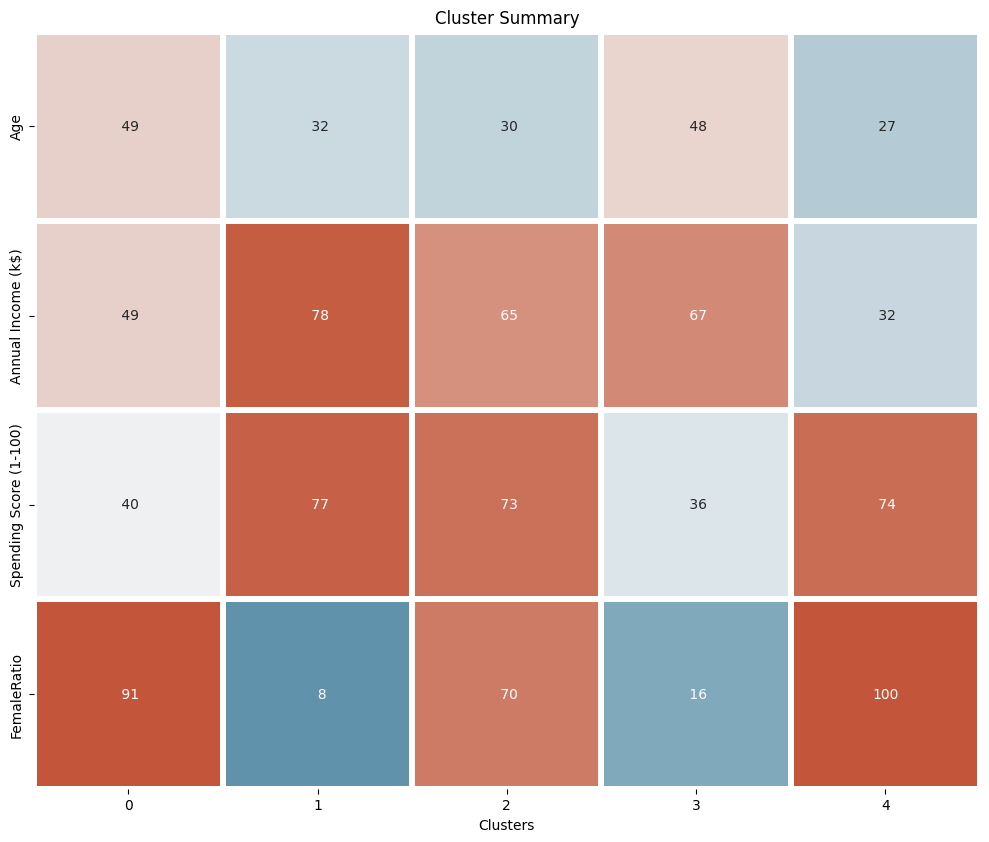

In [70]:
cluster_heatmap_df = train_X.groupby(['Clusters'])[['Age','Annual Income (k$)','Spending Score (1-100)']].median()
heatcmap = sns.diverging_palette(230, 20, as_cmap=True)
cluster_heatmap_df['FemaleRatio'] = train_X[train_X['Gender'] == 'Female'].groupby(['Clusters']).count()['Gender'] / train_X.groupby(['Clusters']).count()['Gender'] * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.heatmap(cluster_heatmap_df.T, 
    square=True,
    linewidth=3,
    vmax=80, 
    vmin=1,
    cmap=heatcmap,
    cbar=False, 
    annot=True,
    fmt='3.0f',
    ax=ax,
)

ax.set_title('Cluster Summary');
plt.tight_layout()